In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

cdict = {'red'  :  ((0., 0., 0.), (0.2, 1., 1.), (0.6, 1., 1.), (1., 0., 0.)),
         'green':  ((0., 0., 0.), (0.2, 0., 0.), (0.6, 1., 1.), (1., 1., 1.)),
         'blue' :  ((0., 0., 0.), (0.2, 0., 0.), (0.6, 0., 0.), (1., 0., 0.))}

my_cmap = colors.LinearSegmentedColormap('my_colormap', cdict, 1024)

In [2]:
data = pd.read_csv('crop_data_Newport.csv') #changed .csv here
#Newport data is here: https://drive.google.com/open?id=1hIIFrDH2Y8MRH_95lgRx2iiQxls9G1pf
data.sort_values(by='SAMPLE_DATE', inplace=True, ascending=True) # This now sorts in date order
data.head()

,Unnamed: 0,PROBE_ID,SAMPLE_DATE,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,X,Y,LOCAL_TIME
768,548201,18000706,2018-06-01 00:00:00,33.617451,-117.888823,16.0,0.0,FLEET51,417551.691068,3.720095e+06,2018-05-31 17:00:00 -0700
50,88450,5b108c8822000bf923550ace003d52f0,2018-06-01 00:00:01,33.621325,-117.928243,267.0,49.0,CONSUMER24,413898.794746,3.720557e+06,2018-05-31 17:00:01 -0700
767,548185,17889490,2018-06-01 00:00:05,33.620126,-117.924678,119.0,5.0,FLEET51,414228.306807,3.720421e+06,2018-05-31 17:00:05 -0700
703,508585,867853,2018-06-01 00:00:06,33.616030,-117.900410,0.0,0.0,FLEET40,416475.490231,3.719947e+06,2018-05-31 17:00:06 -0700
406,375149,19793987,2018-06-01 00:00:16,33.616593,-117.902715,283.0,62.0,FLEET51,416262.209250,3.720011e+06,2018-05-31 17:00:16 -0700


In [3]:
print('unique data provider count',len(data.PROBE_DATA_PROVIDER.unique()))
print('unique Probe_ID count',len(data.PROBE_ID.unique()))
print('unique time',len(data.LOCAL_TIME.unique()))
print('raw data shape',data.shape)
# - Got 18 unique IDs vs 21 in the other set

unique data provider count 16
unique Probe_ID count 722
unique time 23245
raw data shape (30667, 11)


In [4]:
## I think this is where the Newport data is filtered out, in the original .csv the raw data shape is 40,11 here now it is 0,11
t1_series = data[data.LOCAL_TIME == '2018-06-01 16:49:26 -0700' ]
t1_series.head()
print('raw data shape',t1_series.shape)

# t2_series = data[data.LOCAL_TIME.isin'2018-06-01 16:49:26 -0700' ]
# print('raw data shape',t1_series.shape)

raw data shape (0, 11)


In [5]:
# Trajectory
ID_series = data[data.PROBE_ID == '19793987'] #'24046157' ] - I changed to pick a probe ID from the data list, but did not find anything still
ID_series.head()
print('raw data shape',ID_series.shape)

fleet_series = data[data.PROBE_DATA_PROVIDER == 'FLEET51' ]

print('raw data shape',fleet_series.shape)




raw data shape (112, 11)
raw data shape (3706, 11)


# to set specific regions of interest
intersection_center = data[data['edge_id'].isin(intersection_center_edges)]

In [6]:
def pos_heatmap(data,title):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 10))

    scatter = ax.scatter(data['X'].values,
                               data['Y'].values)
    scatter_heat = ax.scatter(data['X'].values,
                               data['Y'].values,
                               c=data['SPEED'], s=45, alpha=0.9,cmap=my_cmap)
    cbar = fig.colorbar(scatter_heat)
    cbar.set_label("Speed (m/s)",fontsize=20)
    cbar.ax.tick_params(labelsize=18)
    plt.title(title,fontsize=25)
    plt.axis('off')
    plt.show()   

def route_map(data,title):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 10))
    scatter = ax.plot(data['X'].values, data['Y'].values)
    plt.title(title,fontsize=25)
    plt.axis('off')
    plt.show() 
    
def mean_speed(data,title):
    plt.figure(figsize = (14,10))
    sns.lineplot(x=data['time'],y=data['speed'])
    plt.title(title,fontsize=25)
    plt.xlabel('Time (s)',fontsize=20)
    plt.ylabel('Mean Speed (m/s)',fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

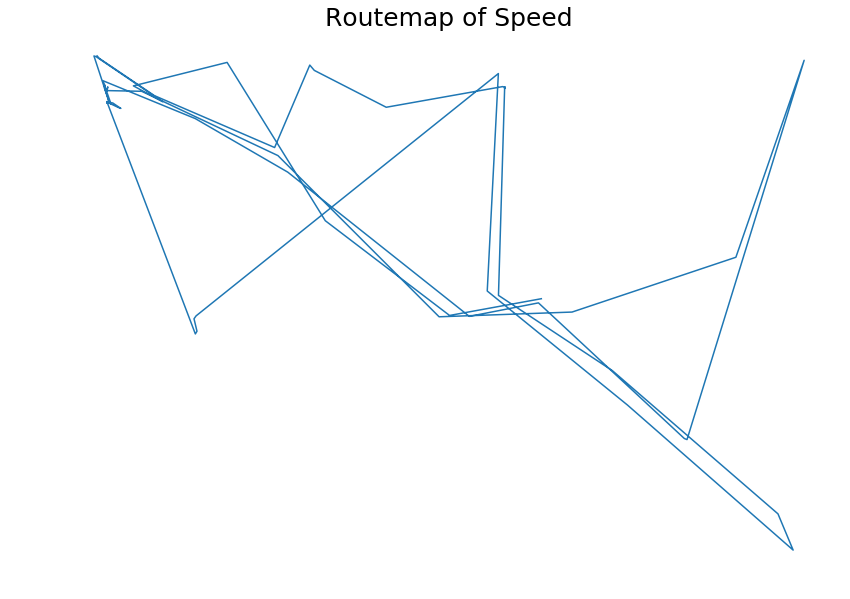

In [7]:
ax = route_map(ID_series,'Routemap of Speed') #Changed to routemap from heatmap

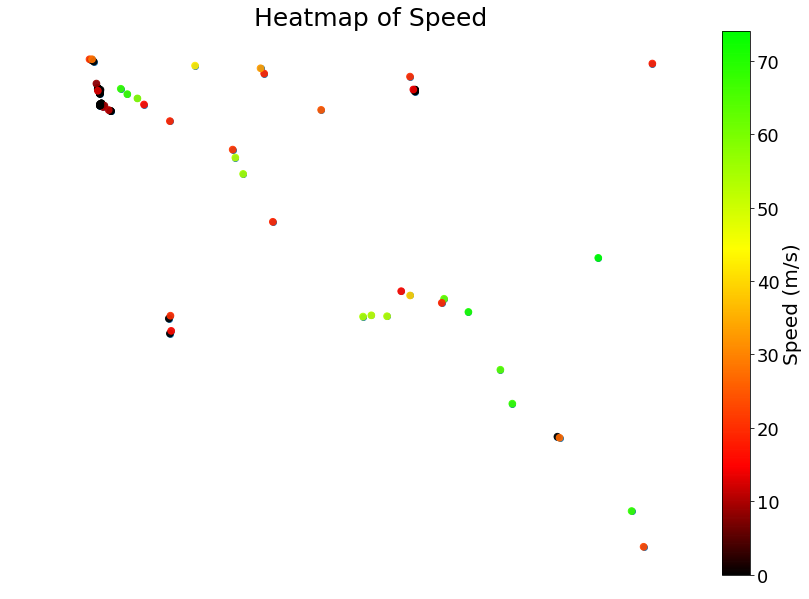

In [8]:
ax = pos_heatmap(ID_series,'Heatmap of Speed')

# Calculate Populations and Speeds in Each Area

In [9]:
import geopandas as gpd
import folium
from shapely.geometry import Polygon, Point, LineString
from datetime import datetime

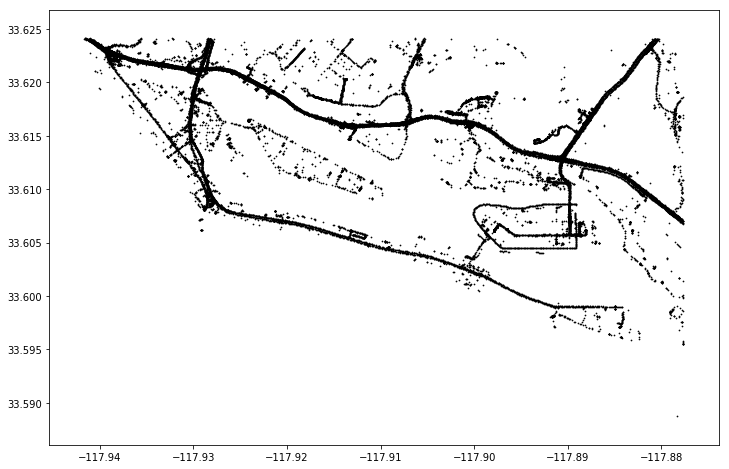

In [10]:
plt.figure(figsize = (12,8))
plt.scatter(data.LONG, data.LAT, s = 0.5, c = 'k')
plt.show()

In [11]:
# Read shape files into geopandas
right_half_tri_SF = gpd.read_file("shapefiles/right_half_triangle/right_half_triangle.shp")[['Name', 'geometry']]
left_half_tri_SF = gpd.read_file("shapefiles/left_half_triangle/left_half_triangle.shp")[['Name', 'geometry']]
island_SF = gpd.read_file("shapefiles/island/island.shp")[['Name', 'geometry']]
newport_SF = gpd.read_file("shapefiles/inundation_map/inundation_map.shp")[['Name', 'geometry']]
# Read Street Shape Files
balboa_blvd = gpd.read_file("shapefiles/Streets/Balboa/Balboa_Blvd-polygon.shp")[['Name', 'geometry']]
w_balboa_blvd = gpd.read_file("shapefiles/Streets/W_Balboa/W_Balboa-polygon.shp")[['Name', 'geometry']]
newport = gpd.read_file("shapefiles/Streets/Newport/Newport_Blvd-polygon.shp")[['Name', 'geometry']]

In [12]:
shape_df = right_half_tri_SF.append([left_half_tri_SF, island_SF,newport_SF])

In [13]:
# Turn coordinates into points
def create_point(row):
    return Point(row['LONG'],row['LAT'])

In [14]:
data['coord'] = data.apply(create_point, axis=1)
data['section'] = 'N/A'

In [15]:
section = []

for i in data.index.values:
    if right_half_tri_SF['geometry'][0].contains(data['coord'][i]):
        section.append('right_half_tri')
    elif left_half_tri_SF['geometry'][0].contains(data['coord'][i]):
        section.append('left_half_tri')
    elif island_SF['geometry'][0].contains(data['coord'][i]):
        section.append('island')
    elif newport_SF['geometry'][0].contains(data['coord'][i]):
        section.append('rest_of_new_port')
    else:
        section.append('N/A')
        
data['section'] = section

In [16]:
street = []

for i in data.index.values:
    if balboa_blvd['geometry'][0].contains(data['coord'][i]):
        street.append('balboa')
    elif w_balboa_blvd['geometry'][0].contains(data['coord'][i]):
        street.append('w_balboa')
    elif newport['geometry'][0].contains(data['coord'][i]):
        street.append('newport')
    else:
        street.append('N/A')
        
data['street'] = street

In [17]:
data_cleaned = data[data.section != 'N/A'][['PROBE_ID','LAT','LONG',\
                                            'HEADING',\
                                            'SPEED',\
                                            'PROBE_DATA_PROVIDER',\
                                            'LOCAL_TIME',\
                                            'coord',\
                                            'section','street']]

In [18]:
print('unique data provider count',len(data_cleaned.PROBE_DATA_PROVIDER.unique()))
print('unique Probe_ID count',len(data_cleaned.PROBE_ID.unique()))
print('unique time',len(data_cleaned.LOCAL_TIME.unique()))
print('raw data shape',data_cleaned.shape)

unique data provider count 13
unique Probe_ID count 208
unique time 5831
raw data shape (6234, 10)


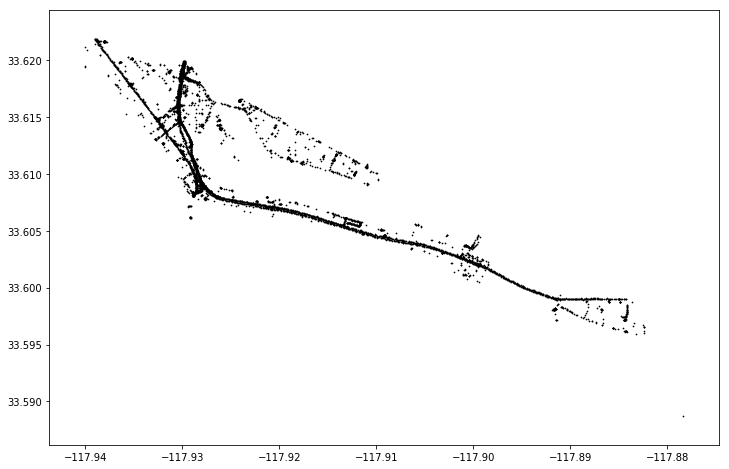

In [19]:
plt.figure(figsize = (12,8))
plt.scatter(data_cleaned.LONG, data_cleaned.LAT, s = 0.5, c = 'k')
plt.show()

## Unique Probes per area

In [20]:
rht_uniq_probe = data_cleaned.loc[data_cleaned['section'] == 'right_half_tri'].PROBE_ID.unique()
lht_uniq_probe = data_cleaned.loc[data_cleaned['section'] == 'left_half_tri'].PROBE_ID.unique()
isl_uniq_probe = data_cleaned.loc[data_cleaned['section'] == 'island'].PROBE_ID.unique()
rest_uniq_probe = data_cleaned.loc[data_cleaned['section'] == 'rest_of_new_port'].PROBE_ID.unique()

In [21]:
data_cleaned['LOCAL_TIME'] = pd.to_datetime(data_cleaned['LOCAL_TIME'])
# Separate to hours
data_cleaned['HOUR'] = data_cleaned['LOCAL_TIME'].dt.hour

# For calcualting heading related info on Balboa and Newport

In [70]:
# To make life easier when dealing with headings
heading_fixed = []
for i in data_cleaned.index.values:
    if data_cleaned['HEADING'][i] >180:
        heading_fixed.append(-(360 - data_cleaned['HEADING'][i]))
    else:
        heading_fixed.append(data_cleaned['HEADING'][i])

In [23]:
data_cleaned['HEADING_FIXED'] = heading_fixed

In [24]:
balboa_df = data_cleaned.loc[data_cleaned['street']=='balboa'].copy()
newport_df = data_cleaned.loc[data_cleaned['street']=='newport'].copy()

## Notes
- For vehicle speeds, assume all 0 speeds means stopping at a light and is ignored

## Headings
- Uses fixed headings
### For Newport
- Northbound: -90 <= heading <= 45
- Southbound: 145 <= heading <= -150

### For Balboa
- Northbound: -140 <= heading <= 0
- Sounthbound: 90 <= heading <= -160





In [79]:
def get_heading_info(df, lower_head, upper_head):
    
    '''
    Inputs:
        df - cleaned up dataframe with hours and streets 
        lower_head - lower heading limits for traffic
        upper_head - upper heading limits for traffic
        
    Outputs:
        head_speed - list of 24 north heading speeds averaged over an hour
        head_probe - list of 24 counts of unique probe ids in that hour
    '''
    head_speed = []
    head_unique_probe = []
    
    for i in range(24):
        head_df = df.loc[(df['HOUR']==i) & \
                         ((df['HEADING_FIXED'] >= lower_head) | \
                         (df['HEADING_FIXED'] <= upper_head))][['PROBE_ID','SPEED']]

        head_unique_probe.append(len(list(set(head_df['PROBE_ID']))))
        head_df[head_df['SPEED'] != 0]
        head_speed.append(np.mean(head_df['SPEED']))
        
    return head_speed, head_unique_probe
    

In [80]:
#Balboa
bal_north_limits = [-90,45]
bal_south_limits = [145,-150]
balboa_north_speed, balboa_north_unique = get_heading_info(balboa_df,\
                                                           bal_north_limits[0],\
                                                           bal_north_limits[1])
balboa_south_speed, balboa_south_unique = get_heading_info(balboa_df,\
                                                           bal_south_limits[0],\
                                                           bal_south_limits[1])

# Newport
newport_north_limits = [-140,0]  
newport_south_limits = [90,-160]
newport_north_speed, newport_north_unique = get_heading_info(newport_df,\
                                                             newport_north_limits[0],\
                                                             newport_north_limits[1])
newport_south_speed, newport_south_unique = get_heading_info(newport_df,\
                                                             newport_south_limits[0],\
                                                             newport_south_limits[1])

In [81]:
# Create a dataframe of road information per hour
road_info_df = pd.DataFrame({'Hour':range(0,24),\
                'Newport_North_Bound':newport_north_speed,\
                'Newport_South_Speed':newport_south_speed,\
                'Newport_North_Probe':newport_north_unique,\
                'Newport_South_Probe':newport_south_unique,\
                'Balboa_North_Bound':balboa_north_speed,\
                'Balboa_South_Speed':balboa_south_speed,\
                'Balboa_North_Probe':balboa_north_unique,\
                'Balboa_South_Probe':balboa_south_unique})



In [82]:
road_info_df

,Hour,Newport_North_Bound,Newport_South_Speed,Newport_North_Probe,Newport_South_Probe,Balboa_North_Bound,Balboa_South_Speed,Balboa_North_Probe,Balboa_South_Probe
0,0,32.826561,36.850000,10,2,12.262608,11.250000,8,3
1,1,31.754098,NaN,5,0,16.898070,NaN,2,0
2,2,9.680000,NaN,1,0,NaN,NaN,0,0
3,3,39.532908,20.000000,2,1,50.478261,50.666667,1,1
4,4,11.265380,22.530760,2,1,34.833333,NaN,2,0
5,5,17.375000,NaN,1,0,33.393805,NaN,1,0
6,6,33.111111,NaN,1,0,NaN,NaN,0,0
7,7,NaN,NaN,0,0,NaN,NaN,0,0
8,8,NaN,NaN,0,0,NaN,NaN,0,0
9,9,NaN,NaN,0,0,NaN,NaN,0,0
